In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn

from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred




# 56K

In [22]:
########   Prepare Data     ########
#Import Data
df = pd.read_excel("Generate Data\DataTb_generate.xlsm",sheet_name="56k")

#Select feature for data
X_data= df["SMILE"]
Y_data= df["Tb"]


In [23]:
X_data_use = X_data[:10000]
Y_data = Y_data[:10000]

X_data_use["molecule"] = X_data_use.apply(lambda x: Chem.MolFromSmiles(x))
X_data_use["morgan_fp"] = X_data_use["molecule"].apply(lambda x: rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius=4, nBits=250, useFeatures=True, useChirality=True))
#X_data_use

In [24]:
#X_data
X_data_fp = []
for i in range(0,X_data_use.shape[0]-2):
    array = np.array(X_data_use["morgan_fp"][i])
    datafram_i = pd.DataFrame(array)
    datafram_i = datafram_i.T
    X_data_fp.append(datafram_i)
X_data_fp = pd.concat(X_data_fp, ignore_index=True)

In [25]:
#X_data_fp
#Y_data

In [26]:
# %%
X_train, X_test, y_train, y_test = train_test_split(X_data_fp, Y_data,test_size=0.3,random_state=42)
########   Model  ########
Linear = LinearRegression()
Linear.fit(X_train, y_train)

LinearRegression()

In [27]:

# %%
# Train set
y_predict_train = Linear.predict(X_train)
#from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

# Test set
y_predict_test = Linear.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

# Total set
y_predict_total = Linear.predict(X_data_fp)
mape_total = mean_absolute_percentage_error(Y_data, y_predict_total)
rmse_total = np.sqrt(mean_squared_error(Y_data, y_predict_total))
R2_total = r2_score(Y_data, y_predict_total)


In [28]:
# Table Score
Morgan_fp__ML_MLR = pd.DataFrame()
data = {
        "MAPE":[mape_train, mape_test, mape_total],
        "RMSE":[rmse_train, rmse_test, rmse_total],
        "R2"  :[R2_train, R2_test, R2_total]
    }
Morgan_fp__ML_MLR = pd.DataFrame(data)
#Morgan_fp__ML_MLR.to_csv('Morgan_fp ML-MLR.csv', index=False)

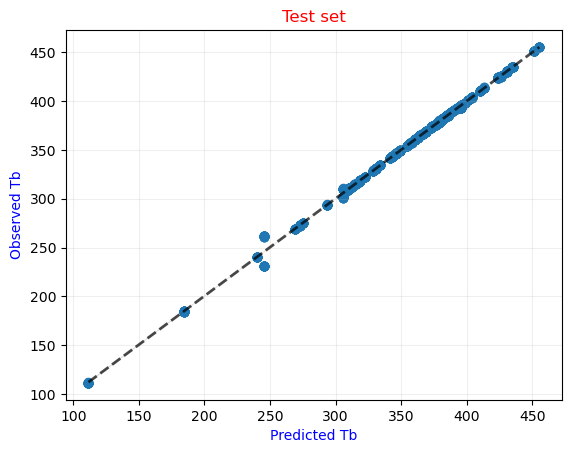

In [29]:
# Plot
# %%
p1=sn.regplot(x=y_predict_test, y=y_test,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.2)
#R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
#MAE = mpatches.Patch(label="MAE={:04.2f}".format(MAE))
#plt.legend(handles=[R2, MAE])


In [30]:
Morgan_fp__ML_MLR

,MAPE,RMSE,R2
0,0.002137,2.227686,0.998219
1,0.002265,2.375349,0.998193
2,0.002175,2.272992,0.998212


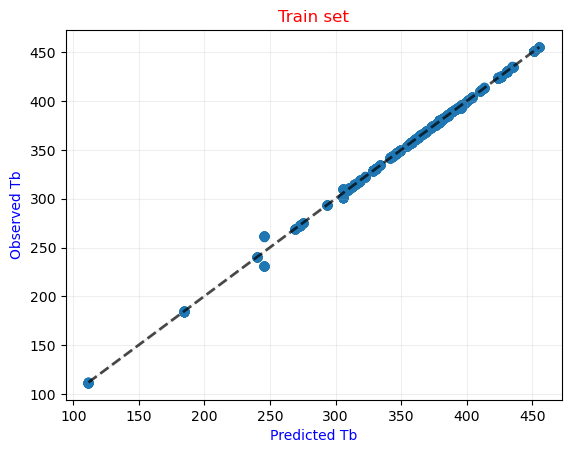

In [31]:

# %%
y_predict_train = Linear.predict(X_train)
p2=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Train set", color='red')
plt.grid(alpha=0.2)
#R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
#MAE = mpatches.Patch(label="MAE={:04.2f}".format(MAE))
#plt.legend(handles=[R2, MAE])


# 2.8 k

In [46]:
#Import Data
df = pd.read_excel("DataTb.xlsx",sheet_name="AllDataSet")

#Select feature for data
X_data= df["SMILES"]
Y_data= df["Tb"]

In [47]:
#X_data_use = X_data[:10000]
#Y_data = Y_data[:10000]
X_data_use = X_data.copy()

X_data_use["molecule"] = X_data_use.apply(lambda x: Chem.MolFromSmiles(x))
X_data_use["morgan_fp"] = X_data_use["molecule"].apply(lambda x: rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius=4, nBits=2**10, useFeatures=True, useChirality=True))
#X_data_use

In [48]:
#X_data
X_data_fp = []
for i in range(0,X_data_use.shape[0]-2):
    array = np.array(X_data_use["morgan_fp"][i])
    datafram_i = pd.DataFrame(array)
    datafram_i = datafram_i.T
    X_data_fp.append(datafram_i)
X_data_fp = pd.concat(X_data_fp, ignore_index=True)

In [49]:
#X_data_fp
#Y_data

In [50]:
# %%
X_train, X_test, y_train, y_test = train_test_split(X_data_fp, Y_data,test_size=0.3,random_state=42)
########   Model  ########
Linear = LinearRegression()
Linear.fit(X_train, y_train)

LinearRegression()

In [51]:

# %%
# Train set
y_predict_train = Linear.predict(X_train)
#from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
mape_train = mean_absolute_percentage_error(y_train, y_predict_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
R2_train = r2_score(y_train, y_predict_train)

# Test set
y_predict_test = Linear.predict(X_test)
mape_test = mean_absolute_percentage_error(y_test, y_predict_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
R2_test = r2_score(y_test, y_predict_test)

# Total set
y_predict_total = Linear.predict(X_data_fp)
mape_total = mean_absolute_percentage_error(Y_data, y_predict_total)
rmse_total = np.sqrt(mean_squared_error(Y_data, y_predict_total))
R2_total = r2_score(Y_data, y_predict_total)


In [52]:
# Table Score
Morgan_fp__ML_MLR = pd.DataFrame()
data = {
        "MAPE":[mape_train, mape_test, mape_total],
        "RMSE":[rmse_train, rmse_test, rmse_total],
        "R2"  :[R2_train, R2_test, R2_total]
    }
Morgan_fp__ML_MLR = pd.DataFrame(data)
#Morgan_fp__ML_MLR.to_csv('Morgan_fp ML-MLR.csv', index=False)

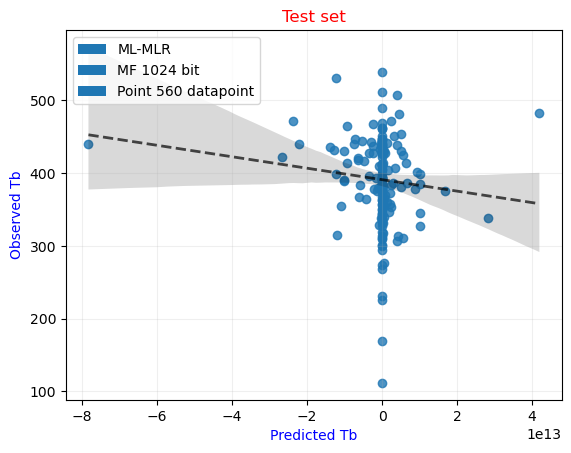

In [64]:
# Plot
# %%
p1=sn.regplot(x=y_predict_test, y=y_test,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Test set", color='red')
plt.grid(alpha=0.2)
TEXT1 = mpatches.Patch(label="ML-MLR")
TEXT2 = mpatches.Patch(label="MF 1024 bit".format())
TEXT3 = mpatches.Patch(label="Point 560 datapoint".format())
plt.legend(handles=[TEXT1, TEXT2, TEXT3])

In [54]:
Morgan_fp__ML_MLR

,MAPE,RMSE,R2
0,1.260599e-02,9.855839e+00,9.717369e-01
1,8.624221e+09,8.957125e+12,-2.201925e+22
2,2.587266e+09,4.906020e+12,-6.868826e+21


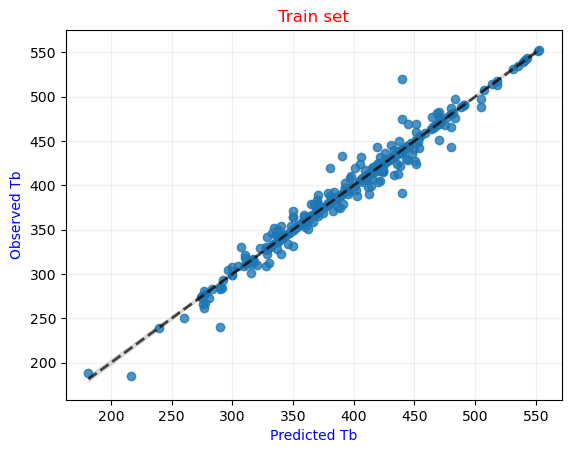

In [55]:

# %%
y_predict_train = Linear.predict(X_train)
p2=sn.regplot(x=y_predict_train, y=y_train,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.7})
plt.xlabel('Predicted Tb', color='blue')
plt.ylabel('Observed Tb', color ='blue')
plt.title("Train set", color='red')
plt.grid(alpha=0.2)
#R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
#MAE = mpatches.Patch(label="MAE={:04.2f}".format(MAE))
#plt.legend(handles=[R2, MAE])
